## Netflix watching history analysis

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Go to your Netflix acct and download your viewing history. Download and import the csv file into your notebook.

In [32]:
import pandas as pd
import numpy as np
import os

In [33]:
os.getcwd()

'/Users/JamesMozina/Desktop/CSUDH/Fall 2021/CIS380 Intro Progmg for Data/MISC'

## Importing the file

In [34]:
netflix = pd.read_csv('data/netflix.csv')
netflix

,Title,Date
0,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
1,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
2,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
3,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
4,A Love Song for Latasha,12/13/21
...,...,...
647,Home,12/5/16
648,Food Choices,11/22/16
649,To Russia with Love,11/18/16
650,Black Mirror: Season 2: White Christmas,10/8/16


## Exploratory Analysis

In [35]:
netflix = netflix.rename(columns={'Title':'title', 'Date':'date'})

In [36]:
netflix.shape
netflix.info()
netflix.head(50)

#look for patterns in the raw data: we want to transfrom titles (movies, series), dates
#understand the raw data

(652, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   652 non-null    object
 1   date    652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


,title,date
0,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
1,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
2,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
3,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21
4,A Love Song for Latasha,12/13/21
5,The Power of the Dog,12/12/21
6,Once Upon a Time in Mexico,12/12/21
7,Heroin(e),12/11/21
8,Bo Burnham: Inside,12/10/21
9,Bram Stoker's Dracula,12/10/21


## Convert to list the title column and then we can count how many parts each movie or serie we have per entry

In [37]:
splitList = netflix.title.str.split(pat = ':', expand=False).to_frame()
splitList

,title
0,"[Countdown, Inspiration4 Mission to Space, L..."
1,"[Countdown, Inspiration4 Mission to Space, L..."
2,"[Countdown, Inspiration4 Mission to Space, L..."
3,"[Countdown, Inspiration4 Mission to Space, L..."
4,[A Love Song for Latasha]
...,...
647,[Home]
648,[Food Choices]
649,[To Russia with Love]
650,"[Black Mirror, Season 2, White Christmas]"


In [38]:
splitList['components'] = splitList.title.apply(len)
splitList.head()

,title,components
0,"[Countdown, Inspiration4 Mission to Space, L...",4
1,"[Countdown, Inspiration4 Mission to Space, L...",4
2,"[Countdown, Inspiration4 Mission to Space, L...",4
3,"[Countdown, Inspiration4 Mission to Space, L...",4
4,[A Love Song for Latasha],1


In [39]:
#Frequency count of component parts
splitList.components.value_counts()

3    339
1    241
4     38
2     34
Name: components, dtype: int64

In [40]:
#Quick analysis of each count

In [41]:
splitList.loc[splitList.components == 1].head(10)

,title,components
4,[A Love Song for Latasha],1
5,[The Power of the Dog],1
6,[Once Upon a Time in Mexico],1
7,[Heroin(e)],1
9,[Bram Stoker's Dracula],1
10,[Labyrinth],1
13,[Silver Linings Playbook],1
14,[Titanic],1
15,[The Holiday],1
17,[The Runaways],1


In [42]:
splitList.loc[splitList.components == 2].head(10)

,title,components
8,"[Bo Burnham, Inside]",2
12,"[King Arthur, Legend of the Sword]",2
16,"[Léon, The Professional]",2
22,"[John & Yoko, Above Us Only Sky]",2
23,"[Ella Fitzgerald, Just One of Those Things]",2
43,"[Bob Ross, Happy Accidents, Betrayal & Greed]",2
44,"[Untold, Caitlyn Jenner]",2
50,"[Blade Runner, The Final Cut]",2
72,"[Breaking Boundaries, The Science Of Our Planet]",2
88,"[Sam Smith, Love Goes - Live at Abbey Road St...",2


In [43]:
splitList.loc[splitList.components == 3].head(10)

,title,components
11,"[Masha and the Bear, Season 4, No Work All C...",3
24,"[Squid Game, Season 1, One Lucky Day]",3
25,"[Squid Game, Season 1, Front Man]",3
26,"[Squid Game, Season 1, VIPS]",3
27,"[Squid Game, Season 1, Gganbu]",3
28,"[Squid Game, Season 1, A Fair World]",3
29,"[Squid Game, Season 1, Stick to the Team]",3
30,"[Squid Game, Season 1, The Man with the Umbr...",3
31,"[Squid Game, Season 1, Hell]",3
32,"[Squid Game, Season 1, Red Light, Green Light]",3


In [44]:
splitList.loc[splitList.components == 4].head(10)

,title,components
0,"[Countdown, Inspiration4 Mission to Space, L...",4
1,"[Countdown, Inspiration4 Mission to Space, L...",4
2,"[Countdown, Inspiration4 Mission to Space, L...",4
3,"[Countdown, Inspiration4 Mission to Space, L...",4
176,"[The Crown, Season 4, 48, 1]",4
193,"[Documentary Now!, Season 3, Batsh*t Valley,...",4
219,"[Self Made, Inspired by the Life of Madam C.J...",4
220,"[Self Made, Inspired by the Life of Madam C.J...",4
221,"[Self Made, Inspired by the Life of Madam C.J...",4
227,"[Self Made, Inspired by the Life of Madam C.J...",4


## It is clear we see a pattern between movies and series: movie contain 1-2 components on their title while series have 3-4 components.

After this analysis we can continue to add need variables in order to further dig our data. We are going to generate new variables, this process is called 'feature extraction'.


In [45]:
import numpy as np

splitList['type'] = np.where(splitList.components < 3, 'movie', 'tvseries')
splitList

,title,components,type
0,"[Countdown, Inspiration4 Mission to Space, L...",4,tvseries
1,"[Countdown, Inspiration4 Mission to Space, L...",4,tvseries
2,"[Countdown, Inspiration4 Mission to Space, L...",4,tvseries
3,"[Countdown, Inspiration4 Mission to Space, L...",4,tvseries
4,[A Love Song for Latasha],1,movie
...,...,...,...
647,[Home],1,movie
648,[Food Choices],1,movie
649,[To Russia with Love],1,movie
650,"[Black Mirror, Season 2, White Christmas]",3,tvseries


## Merge the two dataframes into one, or add to the original.

In [46]:
netflix = pd.concat([netflix,splitList['type']], axis = 1)
netflix

,title,date,type
0,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
1,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
2,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
3,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
4,A Love Song for Latasha,12/13/21,movie
...,...,...,...
647,Home,12/5/16,movie
648,Food Choices,11/22/16,movie
649,To Russia with Love,11/18/16,movie
650,Black Mirror: Season 2: White Christmas,10/8/16,tvseries


In [47]:
##expand title column
splitList_cols = netflix.title.str.split(pat=':', expand=True)
splitList_cols


,0,1,2,3
0,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4
1,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3
2,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2
3,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1
4,A Love Song for Latasha,None,None,None
...,...,...,...,...
647,Home,None,None,None
648,Food Choices,None,None,None
649,To Russia with Love,None,None,None
650,Black Mirror,Season 2,White Christmas,None


In [48]:
splitList_cols.columns =['level1','level2','level3','level4']
splitList_cols

,level1,level2,level3,level4
0,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4
1,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3
2,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2
3,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1
4,A Love Song for Latasha,None,None,None
...,...,...,...,...
647,Home,None,None,None
648,Food Choices,None,None,None
649,To Russia with Love,None,None,None
650,Black Mirror,Season 2,White Christmas,None


In [49]:
netflix

,title,date,type
0,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
1,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
2,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
3,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries
4,A Love Song for Latasha,12/13/21,movie
...,...,...,...
647,Home,12/5/16,movie
648,Food Choices,11/22/16,movie
649,To Russia with Love,11/18/16,movie
650,Black Mirror: Season 2: White Christmas,10/8/16,tvseries


In [50]:
netflix = pd.concat([netflix,splitList_cols], axis = 1)
netflix

,title,date,type,level1,level2,level3,level4
0,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4
1,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3
2,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2
3,Countdown: Inspiration4 Mission to Space: Limi...,12/13/21,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1
4,A Love Song for Latasha,12/13/21,movie,A Love Song for Latasha,None,None,None
...,...,...,...,...,...,...,...
647,Home,12/5/16,movie,Home,None,None,None
648,Food Choices,11/22/16,movie,Food Choices,None,None,None
649,To Russia with Love,11/18/16,movie,To Russia with Love,None,None,None
650,Black Mirror: Season 2: White Christmas,10/8/16,tvseries,Black Mirror,Season 2,White Christmas,None


## the levels will help to dig in more into the data later...


##  We are going to transform the date, put as index, and extract into further variables such year, month, day of month, day of week

In [51]:
## transform date from object to date data type

netflix['date']=pd.to_datetime(netflix.date)

netflix.dtypes

netflix

title             object
date      datetime64[ns]
type              object
level1            object
level2            object
level3            object
level4            object
dtype: object

,title,date,type,level1,level2,level3,level4
0,Countdown: Inspiration4 Mission to Space: Limi...,2021-12-13,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4
1,Countdown: Inspiration4 Mission to Space: Limi...,2021-12-13,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3
2,Countdown: Inspiration4 Mission to Space: Limi...,2021-12-13,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2
3,Countdown: Inspiration4 Mission to Space: Limi...,2021-12-13,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1
4,A Love Song for Latasha,2021-12-13,movie,A Love Song for Latasha,None,None,None
...,...,...,...,...,...,...,...
647,Home,2016-12-05,movie,Home,None,None,None
648,Food Choices,2016-11-22,movie,Food Choices,None,None,None
649,To Russia with Love,2016-11-18,movie,To Russia with Love,None,None,None
650,Black Mirror: Season 2: White Christmas,2016-10-08,tvseries,Black Mirror,Season 2,White Christmas,None


In [52]:
netflix.set_index('date', inplace=True)


In [53]:
netflix

,title,type,level1,level2,level3,level4
date,,,,,,
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1
2021-12-13,A Love Song for Latasha,movie,A Love Song for Latasha,None,None,None
...,...,...,...,...,...,...
2016-12-05,Home,movie,Home,None,None,None
2016-11-22,Food Choices,movie,Food Choices,None,None,None
2016-11-18,To Russia with Love,movie,To Russia with Love,None,None,None


In [54]:
## Create a function to extract components
## very useful function to separate date quickly. Remember the date is as date(time) data type.

In [55]:
def date_atributes(netflix):
    netflix['year'] = netflix.index.year
    netflix['month'] = netflix.index.month_name()
    netflix['dom'] = netflix.index.day
    netflix['dow'] = netflix.index.day_name()
    return(netflix)

In [56]:
date_atributes(netflix)

,title,type,level1,level2,level3,level4,year,month,dom,dow
date,,,,,,,,,,
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 4,2021,December,13,Monday
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 3,2021,December,13,Monday
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 2,2021,December,13,Monday
2021-12-13,Countdown: Inspiration4 Mission to Space: Limi...,tvseries,Countdown,Inspiration4 Mission to Space,Limited Series,Episode 1,2021,December,13,Monday
2021-12-13,A Love Song for Latasha,movie,A Love Song for Latasha,None,None,None,2021,December,13,Monday
...,...,...,...,...,...,...,...,...,...,...
2016-12-05,Home,movie,Home,None,None,None,2016,December,5,Monday
2016-11-22,Food Choices,movie,Food Choices,None,None,None,2016,November,22,Tuesday
2016-11-18,To Russia with Love,movie,To Russia with Love,None,None,None,2016,November,18,Friday


# When did I started using my Netflix subscription or my first movie?

In [57]:
from datetime import date

today =pd.Timestamp(date.today())

firstday =netflix.index.min()

time = today - firstday

print(f'You have been using Netflix for {time.days} days')

#time.days.. adding .days just because, need to read more about it.

You have been using Netflix for 1900 days


## How much had I spent in Netflix until today?

In [58]:
monthly_cost = 9
expense = time.days / 30 * monthly_cost
print(f'You have spent ${expense} in Netflix as of today')

You have spent $570.0 in Netflix as of today


## How long do I spend in Netflix every year?

In [85]:
### set the parameters; since we don't have the time spent per movie or series, lets designate a estimate
# for movies and series in minutes

_min_series = 50
_min_movie = 120


##we are creating a variable to show much we are consuming for the previos year. SO less than 2021. Hence 2020 and
# then we use the function groupby by type of media with count; movies and tvseries

group = netflix.loc[netflix.year < 2021].groupby('type').title.count()
group

#create a variable that calculates minutes per movie spent in a year
#group movies from previous variable and then calculate by the parameter, than the amount of years(in this dataset
#we have 4 years)

minutes_movies_year = group['movie'] * _min_movie / 4

minutes_tvseries_year = group['tvseries'] * _min_series / 4

#calculate days per year, the minutes divide by 60(minutes) and 24(hours)

days_movies_year = minutes_movies_year / 60 / 24

days_tvseries_year = minutes_tvseries_year / 60 / 24


print(f'You spend {round(days_movies_year)} days watching movies and {round(days_tvseries_year)} days watching Tv Series per year' )

type
movie       196
tvseries    290
Name: title, dtype: int64

You spend 4 days watching movies and 3 days watching Tv Series per year


## What are the top 10 TV series you watched from 2016-2020?

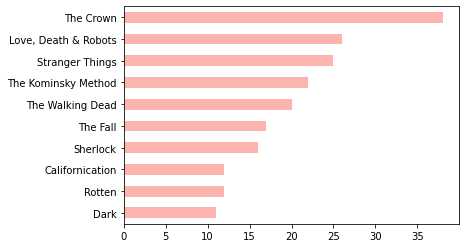

In [87]:
netflix.loc[netflix.type == 'tvseries'].level1.value_counts(ascending=True).tail(10).plot.barh(cmap='Pastel1');

## What are the top 10 Movies you watched from 2016-2020?

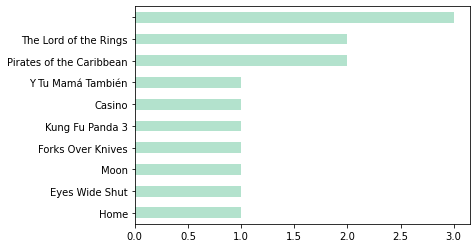

In [113]:
netflix.loc[netflix.type == 'movie'].level1.value_counts(ascending=True).tail(10).plot.barh(cmap='Pastel2');

## Consult with dataset about the nulls and find the tv series with Crown on their title, level1..

In [107]:
netflix.loc[netflix.type == 'movie'].level1.isnull().sum()

0

In [99]:
netflix[netflix.title.str.contains('Crown')]

,title,type,level1,level2,level3,level4,year,month,dom,dow
date,,,,,,,,,,
2020-12-26,The Crown: Season 4: War,tvseries,The Crown,Season 4,War,None,2020,December,26,Saturday
2020-12-26,The Crown: Season 4: Avalanche,tvseries,The Crown,Season 4,Avalanche,None,2020,December,26,Saturday
2020-12-26,The Crown: Season 4: 48:1,tvseries,The Crown,Season 4,48,1,2020,December,26,Saturday
2020-12-06,The Crown: Season 4: The Hereditary Principle,tvseries,The Crown,Season 4,The Hereditary Principle,None,2020,December,6,Sunday
2020-12-05,The Crown: Season 4: Terra Nullius,tvseries,The Crown,Season 4,Terra Nullius,None,2020,December,5,Saturday
2020-11-24,The Crown: Season 4: Fagan,tvseries,The Crown,Season 4,Fagan,None,2020,November,24,Tuesday
2020-11-24,The Crown: Season 4: Favourites,tvseries,The Crown,Season 4,Favourites,None,2020,November,24,Tuesday
2020-11-24,The Crown: Season 4: Gold Stick,tvseries,The Crown,Season 4,Gold Stick,None,2020,November,24,Tuesday
2020-03-09,The Kominsky Method: Season 1: Chapter 5. An A...,tvseries,The Kominsky Method,Season 1,Chapter 5. An Agent Crowns,None,2020,March,9,Monday


## What is the day you spend most of the time watching Netflix?

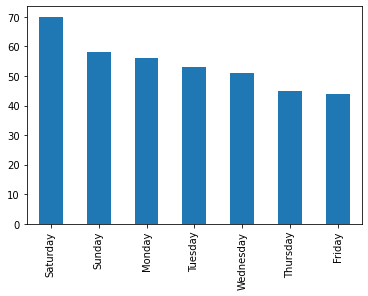

In [118]:
netflix.loc[netflix.type == 'tvseries', 'dow'].value_counts().plot(kind = 'bar')
netflix.loc[netflix.type == 'tvseries', 'dow'].value_counts();

## Visualize the relationship between tvseries and movies

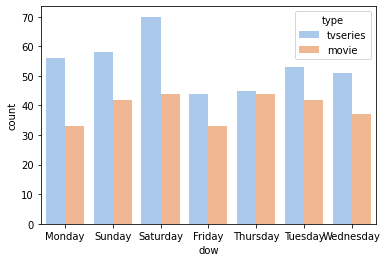

In [122]:
import seaborn as sns

sns.countplot(data=netflix, x='dow', hue='type', palette='pastel');

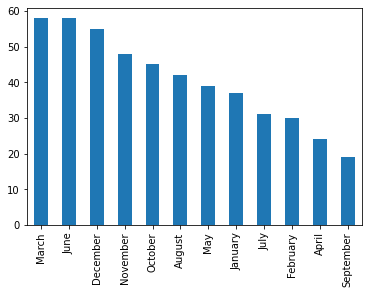

In [123]:
netflix.loc[netflix.year < 2021].month.value_counts().plot.bar();

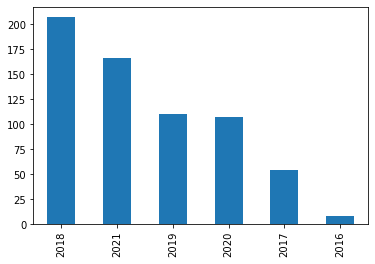

In [124]:
netflix.year.value_counts().plot.bar();